In [73]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Загрузка данных

In [74]:
%%capture
!wget https://www.dropbox.com/s/64ol9q9ssggz6f1/data_ford_price.xlsx

In [75]:
data = pd.read_excel('data_ford_price.xlsx') 

#  Отбор признаков: мотивация

## Предобработка данных

In [76]:
data = data[['price','year', 'cylinders', 'odometer', 'lat', 'long', 'weather']]
data.dropna(inplace = True)

y = data['price']
x = data.drop(columns='price')

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)

## Обучение модели

In [77]:
model = LinearRegression()
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)
 
mae = mean_absolute_error(y_test, y_predicted)
print('MAE: %.3f' % mae)

MAE: 4682.957


## Удаление избыточного признака

In [78]:
x.drop('lat', axis = 1, inplace = True)

In [79]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)

In [80]:
model = LinearRegression()
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)
 
mae = mean_absolute_error(y_test, y_predicted)
print('MAE: %.3f' % mae)

MAE: 4672.930


#  Отбор признаков: классификация методов

## Метод рекурсивного исключения признаков

In [81]:
from sklearn.feature_selection import RFE

In [82]:
y = data['price']
x = data.drop(columns='price')

In [83]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)

In [84]:
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(X_train, y_train)
 
selector.get_feature_names_out()

array(['year', 'cylinders', 'lat'], dtype=object)

In [85]:
X_train.columns

Index(['year', 'cylinders', 'odometer', 'lat', 'long', 'weather'], dtype='object')

In [86]:
selector.ranking_

array([1, 1, 4, 1, 3, 2])

### Задание 9.1

1 point possible (graded)

Какой признак RFE счёл наименее значимым? Используйте метод .ranking_ для ранжирования фичей по степени их важности.

year

odometer

long


Ответ: odometer


Давайте проанализируем результаты RFE:


In [87]:
# Создаем DataFrame с именами признаков и их рангами
feature_ranking = pd.DataFrame({
    'Feature': X_train.columns,
    'Ranking': selector.ranking_
})

# Сортируем по рангу (чем выше ранг, тем менее важен признак)
feature_ranking = feature_ranking.sort_values('Ranking', ascending=False)

print("Ранжирование признаков (чем выше ранг, тем менее важен признак):")
print(feature_ranking)

# Находим наименее значимый признак (с самым высоким рангом)
least_important = feature_ranking.iloc[0]
print(f"\nНаименее значимый признак: {least_important['Feature']} (ранг: {least_important['Ranking']})")

Ранжирование признаков (чем выше ранг, тем менее важен признак):
     Feature  Ranking
2   odometer        4
4       long        3
5    weather        2
0       year        1
1  cylinders        1
3        lat        1

Наименее значимый признак: odometer (ранг: 4)


In [88]:
# Выводим признаки и их ранги
feature_ranking = pd.DataFrame({
    'Feature': X_train.columns,
    'Ranking': selector.ranking_,
    'Selected': selector.support_  # True для выбранных признаков
})

print("Анализ результатов RFE:")
print(feature_ranking)

# Проверяем выбранные признаки
print("\nВыбранные признаки (support_ = True):")
print(selector.get_feature_names_out())

Анализ результатов RFE:
     Feature  Ranking  Selected
0       year        1      True
1  cylinders        1      True
2   odometer        4     False
3        lat        1      True
4       long        3     False
5    weather        2     False

Выбранные признаки (support_ = True):
['year' 'cylinders' 'lat']


##  МЕТОДЫ ВЫБОРА ПРИЗНАКОВ НА ОСНОВЕ ФИЛЬТРОВ

In [89]:
from sklearn.feature_selection import SelectKBest, f_regression

In [90]:
selector = SelectKBest(f_regression, k=3)
selector.fit(X_train, y_train)
 
selector.get_feature_names_out()

array(['year', 'cylinders', 'odometer'], dtype=object)

### Задание 9.4

1/1 point (graded)

Как необходимо дополнить код, чтобы выполнить отбор признаков с помощью ANOVA F-measure?

selector = SelectKBest(___?___, k=3)

Впишите недостающую часть в поле ниже.

f_classif

In [91]:
from sklearn.feature_selection import f_classif
selector = SelectKBest(f_classif, k=3)
selector.fit(X_train, y_train)
selector.get_feature_names_out()


array(['year', 'cylinders', 'odometer'], dtype=object)

# Задание 9.5. Модуль ML-6 (HW-03)

Итак, методы выбора признаков на основе фильтров используют статистические показатели для оценки корреляции или зависимости между входными переменными, которые можно отфильтровать, чтобы выбрать наиболее релевантные признаки.

Статистические меры для селекции признаков должны быть тщательно отобраны на основе типа данных входной и выходной переменных.

Обучите модель линейной регрессии на найденных двумя способами трёх важных признаках и сравните полученные результаты. Загрузите полученный ноутбук (в формате IPYNB) в форму ниже.

In [92]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import (SelectKBest, SelectPercentile, 
                                    f_regression, mutual_info_regression)


In [93]:
# y = data['price']
# x = data.drop(columns='price')
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


In [94]:
# выделение трех столбцов-признаков для обучения на основе выбранных RFE
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(X_train, y_train)
 
selector.get_feature_names_out()
# display(X_train.columns)
# display(selector.ranking_)

# Выводим признаки и их ранги
feature_ranking = pd.DataFrame({
    'Feature': X_train.columns,
    'Ranking': selector.ranking_,
    'Selected': selector.support_  # True для выбранных признаков
})

print("Анализ результатов RFE:")
print(feature_ranking)

# Проверяем выбранные признаки
print("\nВыбранные признаки методом RFE (support_ = True):")
print(selector.get_feature_names_out())

# Сохраняем преобразование для обучающего и тестового наборов
X_train_selected = X_train[selector.get_feature_names_out()]
X_test_selected = X_test[selector.get_feature_names_out()]

# print("Размерности наборов данных:")
# print("X_train:", X_train_selected.shape)
# print("X_test:", X_test_selected.shape)


model = LinearRegression()
model.fit(X_train_selected, y_train)
y_predicted = model.predict(X_test_selected)
 
mae = mean_absolute_error(y_test, y_predicted)
print('MAE: %.3f' % mae)

# Выбранные признаки методом RFE (support_ = True):
# ['year' 'cylinders' 'lat']

# MAE: 5206.677

Анализ результатов RFE:
     Feature  Ranking  Selected
0       year        1      True
1  cylinders        1      True
2   odometer        4     False
3        lat        1      True
4       long        3     False
5    weather        2     False

Выбранные признаки методом RFE (support_ = True):
['year' 'cylinders' 'lat']
MAE: 5096.570


In [ ]:
# # выделение трех столбцов-признаков для обучения на основе выбранных SelectKBest
# выбор признаков на основе f_regression, т.к. выходная переменная непрерывная

selector = SelectKBest(score_func=f_regression, k=3)
selector.fit(X_train, y_train)

# Получаем маску выбранных признаков
selected_features_mask = selector.get_support()

# Создаем DataFrame с результатами
feature_ranking = pd.DataFrame({
    'Feature': X_train.columns,
    'Score': selector.scores_,
    'Selected': selected_features_mask
})

# Сортируем по Score для удобства анализа
feature_ranking = feature_ranking.sort_values('Score', ascending=False)

print("Анализ результатов SelectKBest:")
print(feature_ranking)

# Получаем отобранные признаки
selected_features = selector.get_feature_names_out()

# Создаем новый датасет только с выбранными признаками
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

print("\nВыбранные признаки:", selected_features.tolist())

# Можно также посмотреть отброшенные признаки
rejected_features = X_train.columns[~selected_features_mask]
print("\nОтброшенные признаки:", rejected_features.tolist())

# print("Размерности наборов данных:")
# print("X_train:", X_train_selected.shape)
# print("X_test:", X_test_selected.shape)

model = LinearRegression()
model.fit(X_train_selected, y_train)
y_predicted = model.predict(X_test_selected)
 
mae = mean_absolute_error(y_test, y_predicted)
print('MAE: %.3f' % mae)

# Выбранные признаки: ['year', 'cylinders', 'odometer']
#
# Отброшенные признаки: ['lat', 'long', 'weather']
# MAE: 4800.916

Анализ результатов SelectKBest:
     Feature        Score  Selected
0       year  4179.819702      True
2   odometer   979.316651      True
1  cylinders   317.305166      True
3        lat    33.803150     False
5    weather    31.784856     False
4       long     2.088583     False

Выбранные признаки: ['year', 'cylinders', 'odometer']

Отброшенные признаки: ['lat', 'long', 'weather']
MAE: 4708.946


## Вывод по итогам сравнения выбранных метрик 

При выборе признаков с помощью RFE получены получена метрика MAE: 5206.677, выбранные признаки: ['year', 'cylinders', 'lat']

При выборе признаков с помощью SelectKBest на основе f_regression получена метрика MAE: 4800.916, выбранные признаки: ['year', 'cylinders', 'odometer']. Использование f_regression в качестве функции для отбора признаков выбрано в соответствии с типом выходной переменной (непрерывная).

Сравнение результатов:
MAE: 5206.677 - RFE
MAE: 4800.916 - SelectKBest (лучше)

Какой метод отбора признаков показал наилучший результат на тестовой выборке?

Лучшие результаты на тестовой выборке получены при выборе признаков с помощью метода SelectKBest на основе f_regression.


### Дополнение. Факультативное решение задачи - выделение трех столбцов-признаков для обучения на основе метода SelectPercentile

In [96]:

# # выделение трех столбцов-признаков для обучения на основе выбранных SelectPercentile
# выбор признаков на основе mutual_info_regression, т.к. выходная переменная непрерывная

#selector = SelectPercentile(score_func=f_classif, percentile=50)
selector = SelectPercentile(score_func=mutual_info_regression, percentile=50)

selector.fit(X_train, y_train)

# Получаем маску выбранных признаков
selected_features_mask = selector.get_support()

# Создаем DataFrame с результатами
feature_ranking = pd.DataFrame({
    'Feature': X_train.columns,
    'Score': selector.scores_,
    'Selected': selected_features_mask
})

# Сортируем по Score для удобства анализа
feature_ranking = feature_ranking.sort_values('Score', ascending=False)

print("Анализ результатов SelectPercentile:")
print(feature_ranking)

# Получаем отобранные признаки
selected_features = selector.get_feature_names_out()

# Создаем новый датасет только с выбранными признаками
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

print("\nВыбранные признаки:", selected_features.tolist())

# Можно также посмотреть отброшенные признаки
rejected_features = X_train.columns[~selected_features_mask]
print("\nОтброшенные признаки:", rejected_features.tolist())

# print("Размерности наборов данных:")
# print("X_train:", X_train_selected.shape)
# print("X_test:", X_test_selected.shape)


model = LinearRegression()
model.fit(X_train_selected, y_train)
y_predicted = model.predict(X_test_selected)
 
mae = mean_absolute_error(y_test, y_predicted)
print('MAE: %.3f' % mae)

# Выбранные признаки: ['year', 'odometer', 'long']

# Отброшенные признаки: ['cylinders', 'lat', 'weather']
# MAE: 4823.651


Анализ результатов SelectPercentile:
     Feature     Score  Selected
2   odometer  1.558331      True
0       year  1.208967      True
4       long  1.186897      True
3        lat  1.162196     False
5    weather  0.570571     False
1  cylinders  0.166079     False

Выбранные признаки: ['year', 'odometer', 'long']

Отброшенные признаки: ['cylinders', 'lat', 'weather']
MAE: 4810.040


## Дополнение к Выводу.

При выборе признаков с помощью SelectPercentile на основе mutual_info_regression получена метрика MAE: 4823.651, выбранные признаки: ['year', 'odometer', 'long']

Указанные признаки не совпадают с признаками, выбранными при выборе признаков с помощью метода SelectKBest на основе f_regression, метрика при выборе признаков с помощью метода SelectKBest на основе f_regression оказалась ниже (лучше).

## Дополнительный блок. Комплексный анализ различными статистическими методами для выбора наиболее релевантных признаков


Проверим сделанные выше выводы с помощью комплексного анализа различными статистическими методами для выбора наиболее релевантных признаков.


In [97]:
def detect_feature_types(X, y, categorical_threshold=30):
    """
    Автоматическое определение типов признаков
    
    Parameters:
    -----------
    X : pandas DataFrame
        Входные признаки
    y : pandas Series
        Целевая переменная
    categorical_threshold : int
        Порог уникальных значений для определения категориального признака
        
    Returns:
    --------
    dict : Словарь с информацией о типах признаков
    """
    feature_types = {
        'continuous_features': [],
        'categorical_features': [],
        'target_type': None,
        'feature_details': {}
    }
    
    # Анализ целевой переменной
    unique_target = len(y.unique())
    target_stats = {
        'unique_values': unique_target,
        'dtype': str(y.dtype),
        'is_numeric': pd.api.types.is_numeric_dtype(y)
    }
    
    if target_stats['is_numeric']:
        if unique_target <= categorical_threshold:
            feature_types['target_type'] = 'categorical_numeric'
        else:
            feature_types['target_type'] = 'continuous'
    else:
        feature_types['target_type'] = 'categorical'
    
    # Анализ входных признаков
    for column in X.columns:
        unique_values = len(X[column].unique())
        is_numeric = pd.api.types.is_numeric_dtype(X[column])
        
        feature_info = {
            'dtype': str(X[column].dtype),
            'unique_values': unique_values,
            'is_numeric': is_numeric,
            'min_value': X[column].min() if is_numeric else None,
            'max_value': X[column].max() if is_numeric else None
        }
        
        # Определение типа признака
        if is_numeric:
            if unique_values <= categorical_threshold:
                feature_types['categorical_features'].append(column)
                feature_info['detected_type'] = 'categorical_numeric'
            else:
                feature_types['continuous_features'].append(column)
                feature_info['detected_type'] = 'continuous'
        else:
            feature_types['categorical_features'].append(column)
            feature_info['detected_type'] = 'categorical'
            
        feature_types['feature_details'][column] = feature_info
    
    return feature_types

# Применение функции
feature_analysis = detect_feature_types(X_train, y_train, categorical_threshold=30)

# Вывод результатов
print("АНАЛИЗ ТИПОВ ПРИЗНАКОВ:\n")

print("Целевая переменная:")
print(f"Тип: {feature_analysis['target_type']}")
print(f"Детали: {feature_analysis['feature_details']}\n")

print("Категориальные признаки:")
for feature in feature_analysis['categorical_features']:
    details = feature_analysis['feature_details'][feature]
    print(f"{feature}:")
    print(f"  - Тип данных: {details['dtype']}")
    print(f"  - Уникальных значений: {details['unique_values']}")
    print(f"  - Диапазон: [{details['min_value']}, {details['max_value']}]")
    print()

print("Непрерывные признаки:")
for feature in feature_analysis['continuous_features']:
    details = feature_analysis['feature_details'][feature]
    print(f"{feature}:")
    print(f"  - Тип данных: {details['dtype']}")
    print(f"  - Уникальных значений: {details['unique_values']}")
    print(f"  - Диапазон: [{details['min_value']}, {details['max_value']}]")
    print()


АНАЛИЗ ТИПОВ ПРИЗНАКОВ:

Целевая переменная:
Тип: continuous
Детали: {'year': {'dtype': 'int64', 'unique_values': 44, 'is_numeric': True, 'min_value': np.int64(1957), 'max_value': np.int64(2018), 'detected_type': 'continuous'}, 'cylinders': {'dtype': 'int64', 'unique_values': 5, 'is_numeric': True, 'min_value': np.int64(4), 'max_value': np.int64(10), 'detected_type': 'categorical_numeric'}, 'odometer': {'dtype': 'int64', 'unique_values': 2030, 'is_numeric': True, 'min_value': np.int64(0), 'max_value': np.int64(2490000), 'detected_type': 'continuous'}, 'lat': {'dtype': 'float64', 'unique_values': 2271, 'is_numeric': True, 'min_value': np.float64(24.5552), 'max_value': np.float64(64.878089), 'detected_type': 'continuous'}, 'long': {'dtype': 'float64', 'unique_values': 2275, 'is_numeric': True, 'min_value': np.float64(-151.003024), 'max_value': np.float64(-68.4121), 'detected_type': 'continuous'}, 'weather': {'dtype': 'float64', 'unique_values': 25, 'is_numeric': True, 'min_value': np.flo

Функция detect_feature_types используется для автоматического определения типов признаков в наборе данных. Она анализирует целевую переменную и входные признаки, определяя их типы и статистические характеристики.

Функция принимает два аргумента:

X: pandas DataFrame, входные признаки
y: pandas Series, целевая переменная
categorical_threshold: int, порог уникальных значений для определения категориального признака (по умолчанию 30)

В коде не используется, резерв на будущее.

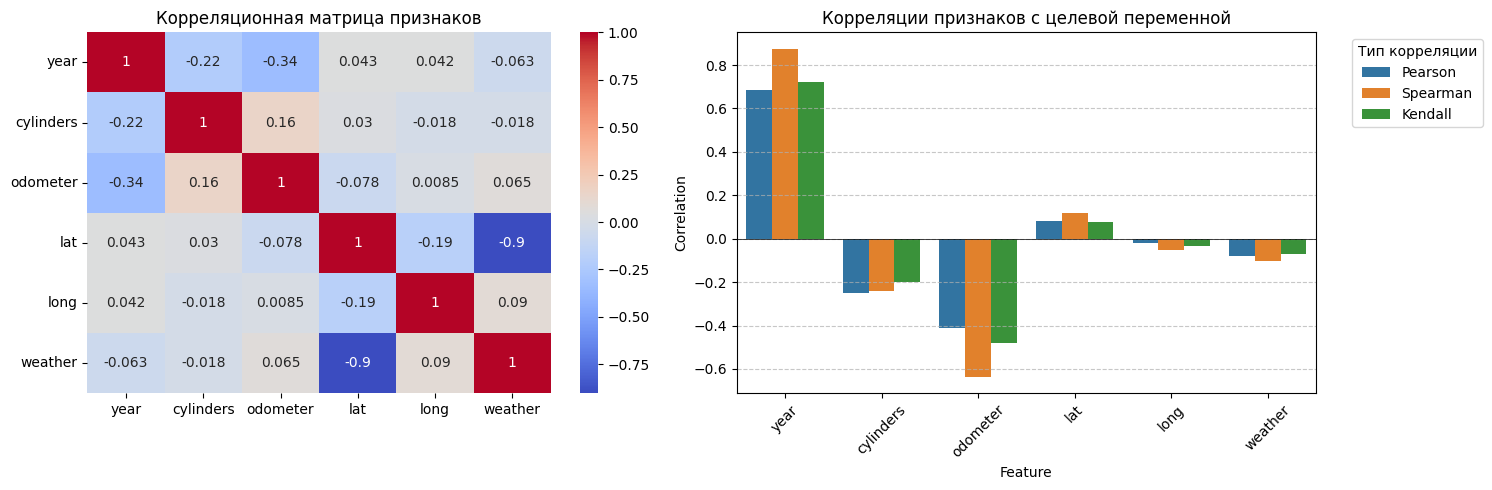


Результаты анализа признаков:
             Feature         Type  Pearson_corr  Spearman_corr  Kendall_tau  \
year            year  categorical      0.682899       0.875033     0.719580   
cylinders  cylinders  categorical     -0.249425      -0.242692    -0.198294   
odometer    odometer   continuous     -0.412252      -0.635140    -0.479075   
lat              lat   continuous      0.083772       0.116553     0.077101   
long            long   continuous     -0.020892      -0.050224    -0.035374   
weather      weather   continuous     -0.081250      -0.104594    -0.072445   

                  VIF  KBest_score  Percentile_score  RFE_rank  
year       959.798676  4179.819702          1.202302         1  
cylinders   64.488837   317.305166          0.151486         1  
odometer     2.805192   979.316651          1.566283         4  
lat        285.594957    33.803150          1.158193         1  
long        51.854719     2.088583          1.180723         3  
weather    238.344232    

In [98]:
# REALISE VERSION
def comprehensive_feature_analysis(X, y, continuous_features, categorical_features):
    """
    Комплексный анализ различными статистическими методами для выбора наиболее релевантных признаков
    """
    # # Автоматическое определение типов признаков - не используется, резерв на будущее
    # feature_types = detect_feature_types(X, y)
    # continuous_features = feature_types['continuous_features']
    # categorical_features = feature_types['categorical_features']

    # 1. Корреляционный анализ
    correlations = {}
    for method in ['pearson', 'spearman', 'kendall']:
        correlations[method] = {}
        for feature in X.columns:
            if method == 'pearson':
                correlations[method][feature] = stats.pearsonr(X[feature], y)[0]
            elif method == 'spearman':
                correlations[method][feature] = stats.spearmanr(X[feature], y)[0]
            else:
                correlations[method][feature] = stats.kendalltau(X[feature], y)[0]
    
    # 2. Мультиколлинеарность (VIF)
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    
    # 3. SelectKBest с f_regression
    selector_k = SelectKBest(score_func=f_regression, k=3)
    selector_k.fit(X, y)
    kbest_scores = pd.Series(selector_k.scores_, index=X.columns)
    
    # 4. SelectPercentile с mutual_info_regression (верхние 50%)
    selector_p = SelectPercentile(score_func=mutual_info_regression, percentile=50)
    selector_p.fit(X, y)
    percentile_scores = pd.Series(selector_p.scores_, index=X.columns)    
    
    # 5. RFE
    estimator = LinearRegression()
    selector_rfe = RFE(estimator, n_features_to_select=3, step=1)
    selector_rfe.fit(X, y)
    rfe_ranking = pd.Series(selector_rfe.ranking_, index=X.columns)
    
    # Собираем все результаты в единую таблицу
    results_df = pd.DataFrame({
        'Feature': X.columns,
        'Type': ['categorical' if f in categorical_features else 'continuous' for f in X.columns],
        'Pearson_corr': [correlations['pearson'][f] for f in X.columns],
        'Spearman_corr': [correlations['spearman'][f] for f in X.columns],
        'Kendall_tau': [correlations['kendall'][f] for f in X.columns],
        'VIF': vif_data['VIF'].values,  # используем .values для избежания проблем с индексами
        'KBest_score': kbest_scores,
        'Percentile_score': percentile_scores,
        'RFE_rank': rfe_ranking
    })

    # Визуализация
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Тепловая карта корреляций
    correlation_matrix = X.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', ax=ax1)
    ax1.set_title('Корреляционная матрица признаков')
    
    # График корреляций с целевой переменной
    correlations_df = pd.DataFrame({
        'Feature': X.columns,
        'Pearson': [correlations['pearson'][f] for f in X.columns],
        'Spearman': [correlations['spearman'][f] for f in X.columns],
        'Kendall': [correlations['kendall'][f] for f in X.columns]
    })
    
    # Преобразуем данные для более удобного отображения
    correlations_melted = correlations_df.melt(
        id_vars=['Feature'],
        var_name='Correlation Type',
        value_name='Correlation'
    )
    
    # Создаем сгруппированный барплот
    sns.barplot(
        data=correlations_melted,
        x='Feature',
        y='Correlation',
        hue='Correlation Type',
        ax=ax2
    )
    
    ax2.set_title('Корреляции признаков с целевой переменной')
    ax2.tick_params(axis='x', rotation=45)
    ax2.axhline(y=0, color='black', linestyle='-', linewidth=0.5)  # добавляем линию y=0
    ax2.grid(True, axis='y', linestyle='--', alpha=0.7)  # добавляем сетку
    
    # Настраиваем легенду
    ax2.legend(title='Тип корреляции', bbox_to_anchor=(1.05, 1), loc='upper left')
       
    plt.tight_layout()
    plt.show()
        
    # Анализ и выводы
    print("\nРезультаты анализа признаков:")
    print(results_df)
    
    print("\nВЫВОДЫ:")
    
    # 1. Анализ корреляционной матрицы
    print("1. Анализ корреляций между признаками:")
    correlation_matrix = X.corr()
    high_correlation_pairs = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            if abs(correlation_matrix.iloc[i,j]) > 0.7:  # порог корреляции
                high_correlation_pairs.append((
                    correlation_matrix.index[i],
                    correlation_matrix.columns[j],
                    correlation_matrix.iloc[i,j]
                ))
    
    if high_correlation_pairs:
        print("\nСильно коррелирующие признаки (|r| > 0.7):")
        for feat1, feat2, corr in high_correlation_pairs:
            print(f"{feat1} - {feat2}: {corr:.3f}")
        print("\nРекомендация: Рассмотреть исключение одного из признаков в каждой паре")
    else:
        print("Сильных корреляций между признаками не обнаружено")
    
    # 2. Мультиколлинеарность
    print("\n2. Мультиколлинеарность:")
    high_vif = results_df[results_df['VIF'] > 5]
    if not high_vif.empty:
        print(f"Признаки с высокой мультиколлинеарностью (VIF > 5):")
        print(high_vif[['Feature', 'VIF']])
    
    # 3. Корреляция с целевой переменной
    print("\n3. Корреляция с целевой переменной:")
    for corr_type in ['Pearson_corr', 'Spearman_corr', 'Kendall_tau']:
        strong_corr = results_df[abs(results_df[corr_type]) > 0.3]
        if not strong_corr.empty:
            print(f"\nСильные {corr_type} корреляции (|r| > 0.3):")
            print(strong_corr[['Feature', corr_type]])
    
    # 4. Результаты методов отбора признаков
    print("\n4. Результаты отбора признаков:")
    
    # RFE
    print("RFE выбрал признаки:", 
          results_df[results_df['RFE_rank'] == 1]['Feature'].tolist())
    
    # SelectKBest
    print("SelectKBest выбрал топ-3 признака:", 
          results_df.nlargest(3, 'KBest_score')['Feature'].tolist())
    
    # SelectPercentile
    selected_by_percentile = results_df[
        results_df['Percentile_score'] > np.median(results_df['Percentile_score'])
    ]['Feature'].tolist()
    print("SelectPercentile (верхние 50%) выбрал признаки:", selected_by_percentile)
 
    # 5. Итоговые рекомендации
    print("\n5. ИТОГОВЫЕ РЕКОМЕНДАЦИИ:")
    
    # Подсчет "голосов" за каждый признак
    feature_votes = {feature: 0 for feature in X.columns}
    
    # RFE голос
    for feature in results_df[results_df['RFE_rank'] == 1]['Feature']:
        feature_votes[feature] += 1
    
    # SelectKBest голос
    for feature in results_df.nlargest(3, 'KBest_score')['Feature']:
        feature_votes[feature] += 1
    
    # SelectPercentile голос
    for feature in selected_by_percentile:
        feature_votes[feature] += 1
    
    # Корреляция с целевой голос
    for feature in results_df[abs(results_df['Pearson_corr']) > 0.3]['Feature']:
        feature_votes[feature] += 1
    
    # Рекомендуемые к включению признаки
    recommended_features = []
    print("Рекомендуемые к включению признаки (получили больше или равно 2 'голосов'):")
    for feature, votes in feature_votes.items():
        if votes >= 2:
            recommended_features.append(feature)
            print(f"{feature}: {votes} голосов")
    
    # Формируем список на исключение
    print("\nРекомендуемые к исключению признаки:")
    exclude_features = set(X.columns) - set(recommended_features)
    print(list(exclude_features))
    
    return results_df

# Применение функции
continuous_features = ['odometer', 'lat', 'long', 'weather']
categorical_features = ['year', 'cylinders']

results = comprehensive_feature_analysis(X_train, y_train, 
                                      continuous_features, 
                                      categorical_features)

## ИТОГОВЫЕ ВЫВОДЫ:

1. Анализ мультиколлинеарности и корреляций:
   - Обнаружена сильная корреляция между признаками lat и weather (-0.901)
   - Высокие значения VIF (>5) у большинства признаков указывают на серьезную мультиколлинеарность
   - Особенно высокие значения VIF у year (959.8) и lat (285.6)

2. Корреляция с целевой переменной (ценой):
   - year: показывает сильную положительную корреляцию по всем метрикам 
     (Pearson: 0.68, Spearman: 0.88, Kendall: 0.72). При этом учитываем, что признак year - числовой категориальный.
   - odometer: показывает умеренную отрицательную корреляцию 
     (Pearson: -0.41, Spearman: -0.64, Kendall: -0.48)
   - Остальные признаки имеют слабую корреляцию с ценой

3. Методы отбора признаков:
   - Все три метода (RFE, SelectKBest, SelectPercentile) согласованно выбрали year
   - odometer и cylinders также часто выбирались разными методами
   - lat, long и weather показали низкую значимость

4. Рекомендации по отбору признаков:

   Включить в модель:
   - year (год выпуска) - наиболее важный предиктор цены
   - odometer (пробег) - второй по важности предиктор
   - cylinders (количество цилиндров) - дополнительный информативный признак

   Исключить из модели:
   - lat и weather из-за сильной взаимной корреляции и высокого VIF
   - long из-за низкой корреляции с целевой переменной и высокого VIF

5. Обоснование выбора:
   - Выбранные признаки (year, odometer, cylinders) получили наибольшее количество "голосов" 
     от разных методов отбора
   - Эти признаки имеют логическую связь с ценой автомобиля
   - Исключенные признаки либо избыточны из-за мультиколлинеарности, 
     либо малоинформативны для предсказания цены


Комплексный анализ различными статистическими методами для выбора наиболее релевантных признаков - подтверждает 
выбранные ранее признаки: ['year', 'cylinders', 'odometer'], показавшие лучшие результаты работы модели на тестовой выборке по метрике MAE.